# Di-Know: Diabetes prediction using machine learning models

The notebook contains code for EDA and ML model training and testing

In [3]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.8 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
import tensorflow as tf

In [6]:
import tensorflow

In [4]:
df= pd.read_csv("D:\Ash_ML\ML_web\Diabetes_proj\datasets\diabetes_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ashwi\AppData\Local\Temp\ipykernel_24356\1539008674.py:1: SyntaxWarning: invalid escape sequence '\A'
  df= pd.read_csv("D:\Ash_ML\ML_web\Diabetes_proj\datasets\diabetes_dataset.csv")


In [5]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)

#INFERENCE: Wesee that glucose levels have the highest corelation with diabetic outcome followed by BMI and Age. Lowest correlation for blood pressure.

Correlation with target Outcome:
 BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
if isinstance(df, pd.DataFrame):
  print("The loaded data is a DataFrame")
else:
  print("The loaded data is not a DataFrame")

The loaded data is a DataFrame


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### EDA

In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


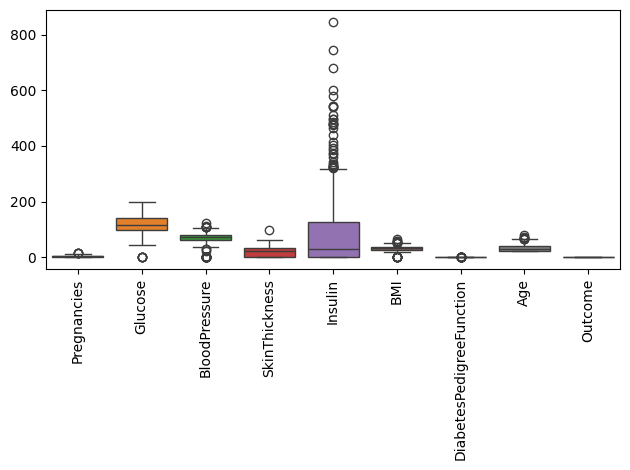

In [9]:
import seaborn as sns
sns.boxplot(data=df)  #making a box plot to visualize the spread of data across all the columns

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [10]:
print(f"shape of dataset, {df.shape}")

shape of dataset, (768, 9)


In [11]:
#df= df.drop('BloodPressure', axis=1)

In [12]:
df= df.drop('SkinThickness', axis=1)#removing skin thickness column

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [14]:
df.info()
 #shows zero null values in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
missing_values = df.isnull().sum()

print("Missing values count:\n", missing_values)

Missing values count:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [17]:
X_n= df.iloc[:,:-1] #This line creates a new DataFrame X containing all the rows and all columns except the last column from the DataFrame df. Essentially, it's selecting all the features (independent variables) and excluding the 'Price' column.
Y_n = df['Outcome']

In [18]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)

#INFERENCE: Wesee that glucose levels have the highest corelation with diabetic outcome followed by BMI and Age.


Correlation with target Outcome:
 BloodPressure               0.065068
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


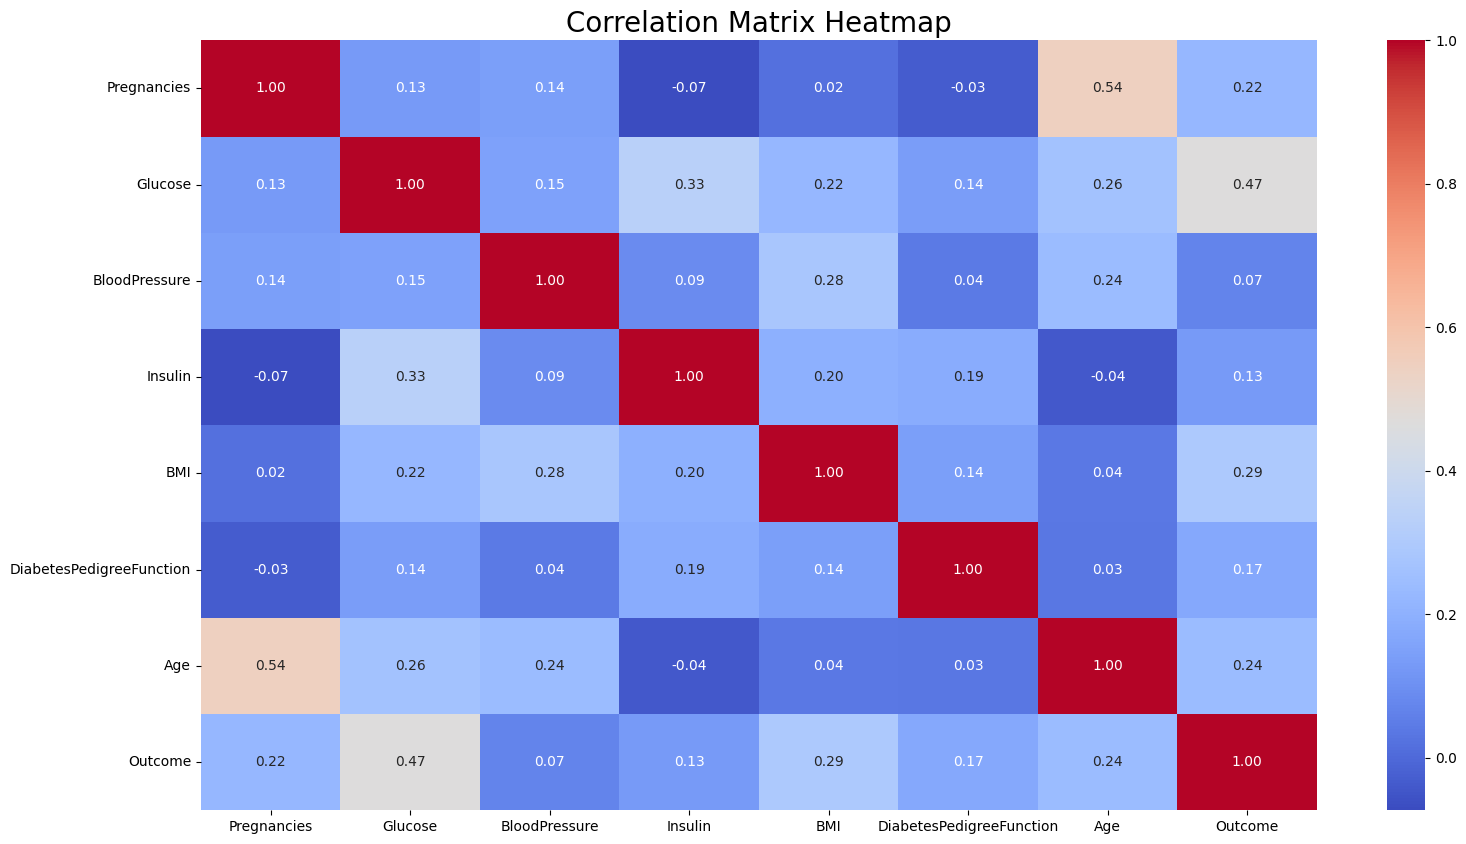

In [19]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') #uses seaborn (sns) library, annot helps to display correlaton value with the each cells itself
#fmt=.2f is for displaying values with 2 decimal places
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.show()

In [20]:
x_train,X_, y_train, y_= train_test_split(X_n,Y_n, test_size=0.4, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
del X_, y_

print(f"shape of X_train, {x_train.shape}")

print(f"shape of X_test, {x_test.shape}")

print(f"shape of X_cv, {x_cv.shape}")

print(f"shape of y_train (target), {y_train.shape}")
print(f"shape of y_test (target), {y_test.shape}")
print(f"shape of y_cv (target), {y_cv.shape}")


shape of X_train, (460, 7)
shape of X_test, (154, 7)
shape of X_cv, (154, 7)
shape of y_train (target), (460,)
shape of y_test (target), (154,)
shape of y_cv (target), (154,)


In [21]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
426,0,94,0,0,0.0,0.256,25
9,8,125,96,0,0.0,0.232,54
249,1,111,86,0,30.1,0.143,23
22,7,196,90,0,39.8,0.451,41
221,2,158,90,0,31.6,0.805,66


In [22]:
y_train.head()

426    0
9      1
249    0
22     1
221    1
Name: Outcome, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=  StandardScaler()


x_train_nor = scaler.fit_transform(x_train) # Normalizing our data. Also scaling functions convert df to numpy arrays
x_test_nor = scaler.transform(x_test)
x_cv_nor = scaler.transform(x_cv)

print(x_train_nor) # Print the normalized data

[[-1.15089159 -0.86604199 -4.08050348 ... -4.23580399 -0.62318423
  -0.68917954]
 [ 1.30008124  0.10264252  1.50624649 ... -4.23580399 -0.69179919
   1.79962799]
 [-0.84451998 -0.33482791  0.92429337 ... -0.24830436 -0.94624635
  -0.86082143]
 ...
 [ 1.91282444 -0.64730678  0.92429337 ...  1.80505924  1.89269781
   0.4264928 ]
 [-1.15089159  0.60260872 -4.08050348 ...  1.38113901 -0.76899103
  -0.34589574]
 [-1.15089159  0.10264252  1.50624649 ... -1.2551149  -0.60603049
  -1.03246333]]


In [24]:
print(f"Computed mean of the training set: {scaler.mean_}")
print(f"Computed standard deviation of the training set: {scaler.scale_}")

Computed mean of the training set: [  3.75652174 121.71521739  70.1173913   80.53913043  31.97434783
   0.47397609  33.03043478]
Computed standard deviation of the training set: [  3.26401008  32.00216343  17.18351465 116.30576545   7.54859004
   0.34977793  11.65216661]


In [25]:
x_train_nor.shape

(460, 7)

In [26]:
x_train_nor_df= pd.DataFrame(x_train_nor) # scaling functions convert df to numpy arrays, so convert back to dataframe
x_train_nor_df.describe()

,0,1,2,3,4,5,6
count,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02
mean,1.544658e-17,-5.020139e-17,3.919570e-16,4.633974e-17,-3.089316e-16,7.144044e-17,1.969439e-16
std,1.001089e+00,1.001089e+00,1.001089e+00,1.001089e+00,1.001089e+00,1.001089e+00,1.001089e+00
min,-1.150892e+00,-3.803343e+00,-4.080503e+00,-6.924775e-01,-4.235804e+00,-1.132079e+00,-1.032463e+00
25%,-8.445200e-01,-7.098026e-01,-3.560035e-01,-6.924775e-01,-6.490415e-01,-6.574917e-01,-7.750005e-01
50%,-2.317768e-01,-1.160927e-01,1.095590e-01,-3.313604e-01,3.398274e-03,-2.672441e-01,-3.458957e-01
75%,6.873380e-01,5.713608e-01,5.751215e-01,4.188173e-01,5.995361e-01,4.096139e-01,6.839557e-01
max,4.057426e+00,2.414986e+00,3.019325e+00,6.581452e+00,3.633215e+00,5.563598e+00,4.116794e+00


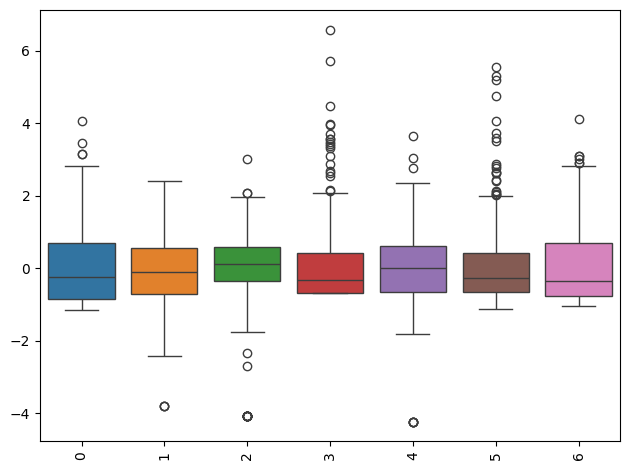

In [27]:
import seaborn as sns
sns.boxplot(data= x_train_nor)

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Model 1: Neural networks for diabetes prediction

In [28]:
np.random.seed(42) #this seeding is done to fix the intialization at same point everytime we run the code fro first

tf.random.set_seed(42)


In [35]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall

model = Sequential([
    Dense(15, activation='relu', name='L1', kernel_regularizer=l2(0.001), input_shape=x_train_nor.shape[1:]),
    Dropout(0.3),  # 30% dropout rate
    Dense(7, activation='relu', name='L2', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # 30% dropout rate
    Dense(1, activation='sigmoid', name='L3')
])



# Callbacks for Early Stopping and Reduce Learning Rate
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True)
]




d:\Ash_ML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


EarlyStopping: Monitors a specific metric (usually validation loss) and stops training if it doesn't improve after a set number of epochs (patience). restore_best_weights=True means that the model will revert to the weights of the epoch with the best performance.

ReduceLROnPlateau: Reduces the learning rate by a factor (here, 0.5) if a monitored metric (usually validation loss) has stopped improving after a set number of epochs (patience).

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 15)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240 (960.00 B)

 Trainable params: 240 (960.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.metrics import Recall # Import Recall

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Recall()]) 
history = model.fit(x_train_nor, y_train, epochs=40, validation_data=(x_cv_nor, y_cv), callbacks=callbacks)

Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5643 - loss: 0.6813 - recall: 0.4304 - val_accuracy: 0.6753 - val_loss: 0.6416 - val_recall: 0.6600
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6175 - loss: 0.6503 - recall: 0.5158 - val_accuracy: 0.6753 - val_loss: 0.6226 - val_recall: 0.6200
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6635 - loss: 0.6461 - recall: 0.4715 - val_accuracy: 0.7013 - val_loss: 0.6080 - val_recall: 0.6200
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6658 - loss: 0.6436 - recall: 0.4984 - val_accuracy: 0.7143 - val_loss: 0.5963 - val_recall: 0.6200
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6029 - loss: 0.6405 - recall: 0.2905 - val_accuracy: 0.7338 - val_loss: 0.5879 - val_recall: 0.6200
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6409 - loss: 0.6456 - recall: 0.3899 - val_accuracy: 0.7403 - val_loss: 0.5815 - val_recall: 0.6200
Epoch 7/40

I chose the best values for hyper parameters that give the lowest loss, and best accuracy/recall after experimenting with multiple sets of hyper paramter values


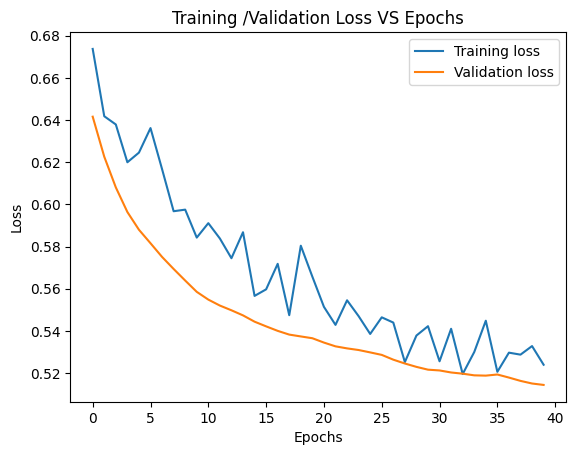

In [35]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training /Validation Loss VS Epochs')
plt.show()

In [36]:
test= model.evaluate(x_test_nor, y_test) #evaluating the model using test set


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7346 - loss: 0.5443 - recall: 0.7148 


In [60]:


from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

### Model 2: SVM model for diabetes prediction

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, r2_score


svm = SVC(kernel='rbf', probability=True)  # Removed the cv=5 parameter

# Fit the model
model_svm = svm.fit(x_train_nor, y_train)

# Predict the probabilities
y_pred_svm_prob = model_svm.predict_proba(x_test_nor)[:, 1]

# Convert probabilities to class labels based on a threshold of 0.5
y_pred_svm_class = (y_pred_svm_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm_class)
precision = precision_score(y_test, y_pred_svm_class)
recall = recall_score(y_test, y_pred_svm_class)
f1 = f1_score(y_test, y_pred_svm_class)
mae = mean_absolute_error(y_test, y_pred_svm_prob)
r2 = r2_score(y_test, y_pred_svm_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Accuracy: 0.7792207792207793
Precision: 0.7142857142857143
Recall: 0.5769230769230769
F1-Score: 0.6382978723404256
Mean Absolute Error (MAE): 0.3215741059653984
R-squared (R²): 0.322742074761211


Given below is a test run of Grid SearchCV for the SVM model. The results closely match the default parameter results


Gamma values: 
 Scale: Uses the inverse of the product of feature count and variance to adjust gamma.
    If scale is passed, then it uses 1 / (n_features * X.var()) as value of gamma.
    
Auto: Uses 1 / n_features. Uses only the number of features to set gamma, ignoring feature variance.
May lead to overfitting (high gamma values) for large datasets. 


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], #regularizer defines the flexibility of decision boundary
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], #kernel defines the type of decision boundary
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # gamma defines the influence of a single training example reaches. Low value means tighter decision boundary
}



# Initialize SVM model
svm = SVC(probability=True)

# Grid Search CV with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train_nor, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Train the best model
best_svm = grid_search.best_estimator_
y_pred_svm_prob = best_svm.predict_proba(x_test_nor)[:, 1]
y_pred_svm_class = (y_pred_svm_prob > 0.5).astype(int)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, r2_score

accuracy = accuracy_score(y_test, y_pred_svm_class)
precision = precision_score(y_test, y_pred_svm_class)
recall = recall_score(y_test, y_pred_svm_class)
f1 = f1_score(y_test, y_pred_svm_class)
mae = mean_absolute_error(y_test, y_pred_svm_prob)
r2 = r2_score(y_test, y_pred_svm_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Accuracy: 0.7727272727272727
Precision: 0.717948717948718
Recall: 0.5384615384615384
F1-Score: 0.6153846153846154
Mean Absolute Error (MAE): 0.3393447193517345
R-squared (R²): 0.27395859047000903


### Model 3: Elastic net regression for diabetes prediciton

ElasticNetCV(cv=5) does 5-fold cross-validation to find the best alpha and l1_ratio automatically.

l1_ratio=1 → Pure Lasso

l1_ratio=0 → Pure Ridge

0 < l1_ratio < 1 → Elastic Net (a mix of both)

In [68]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import ElasticNetCV
elastic=ElasticNetCV(cv=5)


model_en= elastic.fit(x_train_nor,y_train)
y_pred_en=model_en.predict(x_test_nor)
y_pred_en_class_en = (y_pred_en > 0.5).astype(int)  


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_en_class_en)
precision = precision_score(y_test, y_pred_en_class_en)
recall = recall_score(y_test, y_pred_en_class_en)
f1 = f1_score(y_test, y_pred_en_class_en)
mae = mean_absolute_error(y_test, y_pred_en)
r2 = r2_score(y_test, y_pred_en)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Accuracy: 0.7532467532467533
Precision: 0.6590909090909091
Recall: 0.5576923076923077
F1-Score: 0.6041666666666666
Mean Absolute Error (MAE): 0.3538334690180521
R-squared (R²): 0.24512835156233637


In [38]:
elastic.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [34]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 7.5 MB/s eta 0:00:17
   - -------------------------------------- 3.4/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 5.0/124.9 MB 8.6 MB/s eta 0:00:14
   - -------------------------------------- 6.0/124.9 MB 8.0 MB/s eta 0:00:15
   -- ------------------------------------- 6.8/124.9 MB 6.7 MB/s eta 0:00:18
   -- ------------------------------------- 7.9/124.9 MB 6.3 MB/s eta 0:00:19
   -- ------------------------------------- 9.2/124.9 MB 6.3 MB/s eta 0:00:19
   --- ------------------------------------ 11.0/124.9 MB 6.6 MB/s eta 0:00:18
   ---- ----------------------------------- 12.8/124.9 MB 6.8 MB/s eta 0:00:17
   ---- ----------------------------------- 14.4/124.9 MB 6.9 MB/s eta 0:00:16
   ----- ---------------------------------- 16.3/124.9 MB 7.2 MB/s eta 0:00:16
   ----- ---------------------------------- 18.1/124.9 MB 7.2 MB/s

# XGBoost model for diabetes prediciton

In [67]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, r2_score

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for weight updates
    'max_depth': [3, 5, 7],  # Tree depth
    
    
}

# 5-fold Cross-Validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with cross-validation
grid_search_xgb.fit(x_train_nor, y_train)

# Get the best model
best_xgb = grid_search_xgb.best_estimator_

# Predict on test set
y_pred_xgb_prob = best_xgb.predict_proba(x_test_nor)[:, 1]  # Probabilities
y_pred_xgb_class = (y_pred_xgb_prob > 0.5).astype(int)  # Convert to class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_class)
precision = precision_score(y_test, y_pred_xgb_class)
recall = recall_score(y_test, y_pred_xgb_class)
f1 = f1_score(y_test, y_pred_xgb_class)
mae = mean_absolute_error(y_test, y_pred_xgb_prob)
r2 = r2_score(y_test, y_pred_xgb_prob)


d:\Ash_ML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:30:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [72]:

# Print results
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
print("\n")
print(" Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


 Accuracy: 0.7532467532467533
Precision: 0.6296296296296297
Recall: 0.6538461538461539
F1-Score: 0.6415094339622641
Mean Absolute Error (MAE): 0.28699541091918945
R-squared (R²): 0.31366926431655884


### Pickle the models

In [225]:
scaler


StandardScaler()

In [226]:
model

<Sequential name=sequential_33, built=True>

In [227]:
model_svm

SVC(probability=True)

In [228]:
model_en

ElasticNetCV(cv=5)

In [231]:
import pickle
pickle.dump(scaler,open('models3/diabetes3_scaler.pkl', 'wb'))
pickle.dump(model_en,open('models3/diabetes3_ene.pkl', 'wb'))
pickle.dump(model_svm,open('models3/diabetes3_svm.pkl', 'wb'))

In [230]:
model.save('models3/diabetes3_ann.h5')
